# Class 10: Answers 

## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import shapiro

warnings.filterwarnings("ignore")

## Part 1. One categorical explanatory variable. Numerical response variable.

### Do the horns of horned-lizards protect them from predation?

- Read in the data and use an appropriate graph to visually examine the relationship between horn length and predation status. 

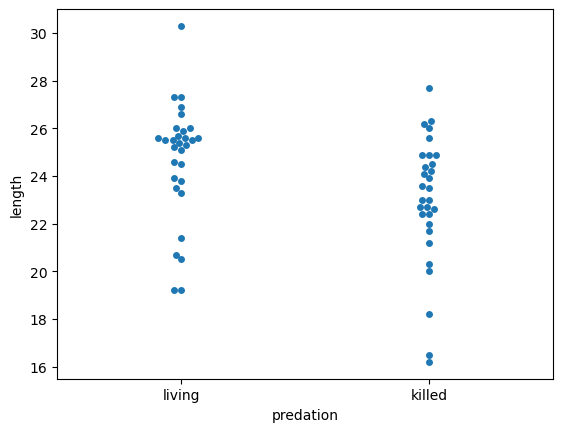

In [2]:
lizards = pd.read_csv('../Datasets/horned_lizards.csv')
lizards
sns.swarmplot(x='predation', y='length', data=lizards);

- State the null and alternative hypotheses. 

- H0: Mean horn lengths of predated and non-predated horned lizards are the same.
- HA: Mean horn lengths of predated and non-predated horned lizards are different.

- Write the model formula for the relationship between horn length and predation status.
- Fit the model and test the null hypothesis.

In [3]:
formula = 'length ~ predation'
fit = ols(formula, lizards).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,22.9867,0.472,48.704,0.000,22.042,23.931
predation[T.living],1.7100,0.667,2.562,0.013,0.374,3.046


- Report the outcome of the test as you would in a scientific report or paper. This means report the estimate of the difference including its 95% CI, the value of the test-statistic (in this case *t*) and the *p*-value. Also say whether the the outcome supports or not the biological hypothesis.

Mean horn length of horned lizards that lived is 1.7 mm longer (95%CI [0.4, 3.0] mm) than that of lizards that were killed (*t* = 2.6, *p* = 0.013). This supports the hypothesis that the horns of horned lizards offer some protection against being eaten by one of their main predators, the loggerhead shrike, *Lanius ludovicianus*.

### Can light shone on knees reset your circadian clock?

- Read in the data and use an appropriate graph to visually examine the relationship between light treatment and phase shift. 

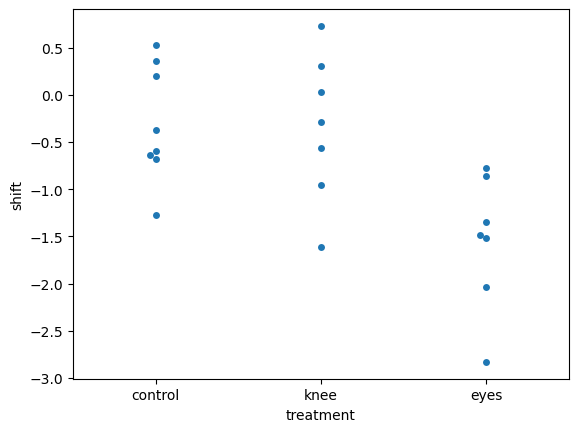

In [4]:
knees = pd.read_csv('../Datasets/knees.csv')
knees
sns.swarmplot(x='treatment', y='shift', data=knees);


- State the null and alternative hypotheses for both biological hypotheses. 

- H0: Mean phase shifts between "knee" and control treatments are the same.
- HA: Mean phase shifts between "knee" and control treatments are different.
- H0: Mean phase shifts between "eye" and control treatments are the same.
- HA: Mean phase shifts between "eye" and control treatments are different.

- Write the model formula for the relationship between phase shift and light treatment.
- Fit the model and test the null hypotheses.

In [5]:
formula = 'shift ~ treatment'
fit = ols(formula, knees).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.3087,0.249,-1.241,0.230,-0.830,0.212
treatment[T.eyes],-1.2427,0.364,-3.411,0.003,-2.005,-0.480
treatment[T.knee],-0.0270,0.364,-0.074,0.942,-0.790,0.736


- Report the outcome of the test as you would in a scientific report or paper. This means report the estimates of the differences including their 95% CIs, the values of the test-statistic (in this case *t*) and the *p*-values. Also say whether the the outcomes support or not the biological hypotheses.

Shining light in eyes significantly shifted the circadian clock by 1.2 hours (95% [0.5, 2.0] hours) relative to no intervention after two days (*t* = 3.4, *p* = 0.003). Whereas shining light on the backs of knees had no significant effect on the circadian clock (*t* = 0.07, *p* = 0.9) relative to no intervention.

## Part 2. One numerical explanatory variable. Numerical response variable.

### Is soil nitrogen content affected by the number of different earthworm species?

- Read in the data and use an appropriate graph to visually examine the relationship between nitrogen content and number of worm species. 

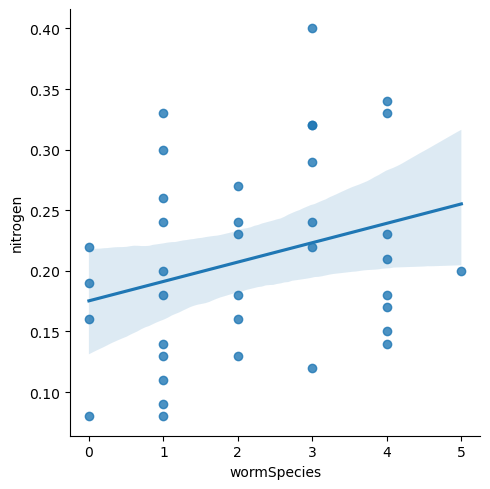

In [8]:
worms = pd.read_csv('../Datasets/earthworms.csv')
worms
sns.lmplot(x='wormSpecies', y='nitrogen', data=worms);

- State the null and alternative hypotheses regarding the relationship between nitrogen content and number of worm species. 

- H0: The slope of the relationship between number of earthworm species and soil nitrogen content is zero.
- HA: The slope of the relationship between number of earthworm species and soil nitrogen content is not zero.

- Write the model formula for the relationship between number of earthworm species and soil nitrogen content.
- Fit the model and test the null hypothesis.

In [9]:
formula = 'nitrogen ~ wormSpecies'
fit = ols(formula, worms).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1753,0.024,7.389,0.000,0.127,0.223
wormSpecies,0.0160,0.009,1.756,0.088,-0.002,0.034


- Report the outcome of the test as you would in a scientific report or paper.

There is no significant relationship between the number of species of earthworms and soil nitrogen content in north american forests (*t* = 1.8, *p* < 0.088).

### What is the relationship between "file" length and call frequency of bush crickets?

- Read in the data and use an appropriate graph to visually examine the relationship between song frequency and file length.

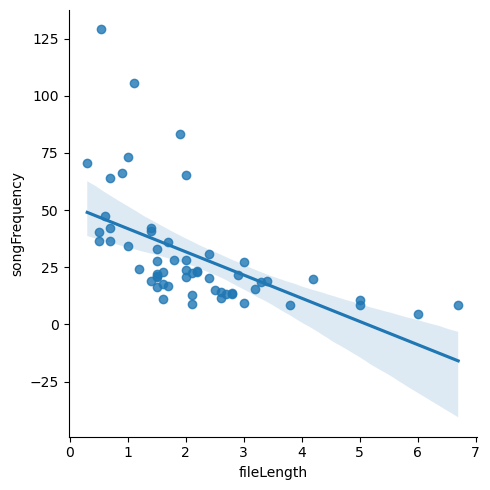

In [10]:
bc = pd.read_csv('../Datasets/bush_crickets.csv')
bc
sns.lmplot(x='fileLength', y='songFrequency', data=bc);

- Test if `songFrequency` is normally distributed.
- Test if `fileLength` is normally distributed.

In [11]:
print(shapiro(bc['songFrequency']))
print(shapiro(bc['fileLength']))

ShapiroResult(statistic=0.7757360373918177, pvalue=5.155468866333372e-08)
ShapiroResult(statistic=0.8892041778926382, pvalue=7.111804982900769e-05)


- Log-transform songFrequency and fileLength and retest these for normality.

In [12]:
bc['logsongFrequency'] = np.log(bc['songFrequency'])
bc['logfileLength'] = np.log(bc['fileLength'])

print(shapiro(bc['logsongFrequency']))
print(shapiro(bc['logfileLength']))

ShapiroResult(statistic=0.9838046262703551, pvalue=0.6302431324920699)
ShapiroResult(statistic=0.97282129506151, pvalue=0.2173383112918693)


- Plot log-songFrequency against log-fileLength to see whether the fit of the regression line improves. 

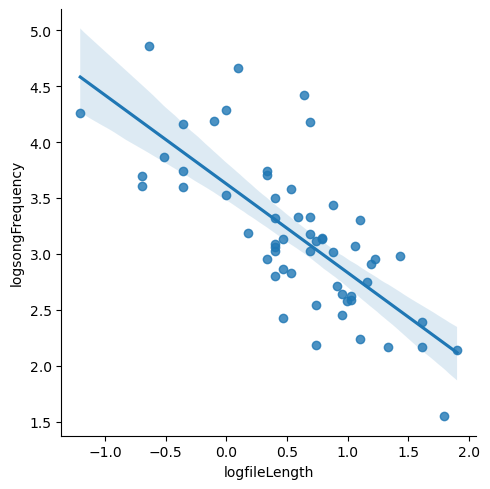

In [13]:

sns.lmplot(x='logfileLength', y='logsongFrequency', data=bc);

- Write the model formula for the relationship between log song frequency and log file length.
- Fit the model.

In [14]:
formula = 'logsongFrequency ~ logfileLength'
fit = ols(formula, bc).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6261,0.081,44.661,0.000,3.463,3.789
logfileLength,-0.7935,0.095,-8.377,0.000,-0.983,-0.604


- Write the formula for the relationship between song frequency and file length using the estimates from the model fit.
- Use the laws of logs to remove the logs from your formula.

$$
\log(\mathrm{song\ frequency}) = 3.63 - 0.79 \times \log(\mathrm{file\ length})
$$

Exponentiating both sides gives:

$$
\exp(\log(\mathrm{song\ frequency})) = \exp(3.63 - 0.79 \times \log(\mathrm{file\ length}))
$$

Then simplify using the laws of logs:
$$
\mathrm{song\ frequency} = \exp(3.63) \times \exp(- 0.79 \times \log(\mathrm{file\ length}))
$$

$$
\mathrm{song\ frequency} = 37.3 \times \exp(\log(\mathrm{file\ length}^{-0.79}))
$$

$$
\mathrm{song\ frequency} = 37.3 \times \mathrm{file\ length}^{-0.79}
$$



- Report the outcome of the test as you would in a scientific report or paper.

Bush cricket song frequency is related to file length with an exponent of -0.79 (95%CI: [-0.98, -0.64], *t* = 8.4, *p* < 0.001).

The fossil of an 165 million year old extinct bush cricket species *Archaboilus musicus* has been discovered. It's file length is 9.34 mm. What was its song frequency based on your analysis of living bush crickets?

In [15]:
print(f'{37.3*9.34**(-0.79):.1f} Hz')

6.4 Hz
